In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

file = np.loadtxt('1M_track.txt')

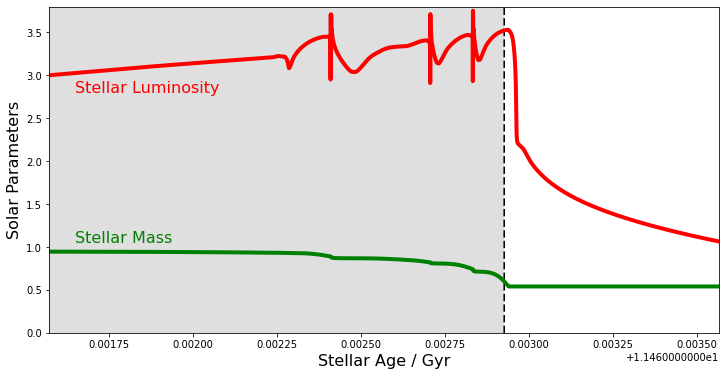

In [35]:
tfull = file[:,0]
mfull = file[:,1]
lfull = file[:,6]
phsef = file[:,-1]

sol_t = file[807:1677,0]
sol_m = file[807:1677,1]
sol_l = file[807:1677,6]
phase = file[807:1677,-1]

log_l = InterpolatedUnivariateSpline(sol_t, sol_l,k=1)
m_sol = InterpolatedUnivariateSpline(sol_t, sol_m,k=1)

step = np.random.randint(0,len(sol_t))
x = np.linspace(sol_t[0],sol_t[-1],1000000)
l = log_l(x)
m = m_sol(x)


fig, ax = plt.subplots(figsize=(12,6))
#ax.scatter(sol_t/1e9,sol_m,c='g',s=40,alpha=0.05)
#ax.scatter(sol_t/1e9,sol_l,c='r',s=40,alpha=0.05)
ax.plot(np.full(50,sol_t[601]/1e9),np.linspace(0,3.8),'k--',lw=2,zorder=0)
ax.fill_between(np.linspace(sol_t[0]/1e9,sol_t[601]/1e9),np.zeros(50),np.full(50,3.8),facecolor='silver',alpha=.5)
ax.plot(x/1e9,l,'r',lw=4)
ax.plot(x/1e9,m,'g',lw=4)
ax.set_xlim(sol_t[0]/1e9,sol_t[-1]/1e9)
ax.set_ylim(0,3.8)
ax.set_ylabel('Solar Parameters',fontsize=16)
ax.text(.00165+ 11.46,2.8,'Stellar Luminosity',c='r',fontsize=16)
ax.text(.00165 + 11.46,1.05,'Stellar Mass',c='g',fontsize=16)
ax.set_xlabel("Stellar Age / Gyr",fontsize=16)
fig.savefig('Stellar_params.png',dpi=300)
fig.show()

In [5]:
it = 0
while it < len(phase):
    if phase[it] == 6:
        print(it)
        break
    it += 1

601
